In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
data = np.load("data_small.npy")
label = np.load("label_small.npy")

In [107]:
def pla_algorithm():
  vectorSize = data.shape[1]
  weightVector=np.zeros(vectorSize)
  #weightVector=np.random.rand(vectorSize)
  #limit = np.sqrt(6 / (vectorSize + 1))
  #weightVector = np.random.uniform(-limit, limit, vectorSize)
  misClassifiedIndex = 0
  iteration=0
  while True:
    misClassifiedIndex = find_misclassfied_example(weightVector);
    if misClassifiedIndex == None:
      break
    weightVector += label[misClassifiedIndex] * data[misClassifiedIndex]
    iteration+=1

  return weightVector,iteration

In [99]:
def find_misclassfied_example(weightVector: np.ndarray) -> np.ndarray:
  for index,element in enumerate(data):
    if isMisclassified(weightVector,element,label[index]):
      return index;

In [100]:
def isMisclassified(weightVector: np.ndarray,dataPoint: np.ndarray, label: int):
  return np.dot(weightVector,dataPoint) * label <= 0;

In [117]:
weightVector,iteration_number=pla_algorithm()
print(weightVector)
print(iteration_number)

[-1.05226491  0.81094371  0.19354116]
[-1.05226491  1.41844719  0.86559526]
8


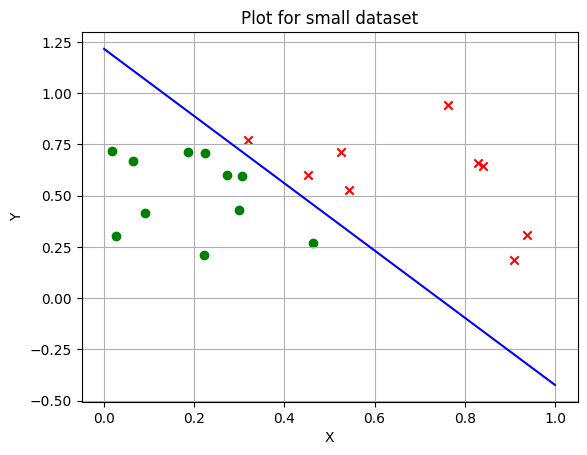

In [120]:
for index,element in enumerate(data):
  plt.scatter(element[1],element[2],marker= "x" if label[index] == 1 else "o",color="red" if label[index] == 1 else "green")
x_values = np.linspace(0, 1, 2)  # Adjust the range as needed

y_values = -(weightVector[1]/weightVector[2])*x_values - (weightVector[0]/weightVector[2])

# Plot the line
plt.plot(x_values, y_values, color= "blue",markersize=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot for small dataset')
plt.grid(True)
plt.show()